<a href="https://colab.research.google.com/github/uttejkalluri2005/RNN-project/blob/main/Google_Stock_using_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [ ]:
df = pd.read_csv("Google_Stock_Price_Train.csv")

In [ ]:
op = df.iloc[:,1:2].values

In [ ]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler

In [ ]:
sc = MinMaxScaler(feature_range=(0,1))

In [ ]:
train_set = sc.fit_transform(op)

In [ ]:
train_set.shape

(1258, 1)

In [ ]:
x_train=[]
y_train=[]
for i in range(60,1258):
  x_train.append(train_set[i-60:i,0])
  y_train.append(train_set[i])
x_train,y_train = np.array(x_train),np.array(y_train)


In [ ]:
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

array([[0.08627874],
       [0.08471612],
       [0.07454052],
       ...,
       [0.95725128],
       [0.93796041],
       [0.93688146]])

In [ ]:
x_train.shape

(1198, 60)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [ ]:
reg = Sequential()

In [ ]:
reg.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
reg.add(Dropout(0.2))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

In [ ]:
reg.add(LSTM(units=50,return_sequences=True))
reg.add(Dropout(0.2))

In [ ]:
reg.add(LSTM(units=50))
reg.add(Dropout(0.2))

In [ ]:
reg.add(Dense(units=1))

In [ ]:
reg.compile(optimizer="adam",loss="mean_squared_error")

In [ ]:
reg.fit(x_train,y_train,batch_size=32,epochs=100)

Epoch 1/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 16s 145ms/step - loss: 0.1213
Epoch 2/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 145ms/step - loss: 0.0074
Epoch 3/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.0075
Epoch 4/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 161ms/step - loss: 0.0068
Epoch 5/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 12s 205ms/step - loss: 0.0049
Epoch 6/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 168ms/step - loss: 0.0056
Epoch 7/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 151ms/step - loss: 0.0050
Epoch 8/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 182ms/step - loss: 0.0049
Epoch 9/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 182ms/step - loss: 0.0049
Epoch 10/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 143ms/step - loss: 0.0048
Epoch 11/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 162ms/step - loss: 0.0046
Epoch 12/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 144ms/step - loss: 0.0047
Epoch 13/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 183ms/step - loss: 0.0043
Epoch 14/100
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 160ms/step - loss: 0.0045
Epoch 15/100
38/38 ━━━━━━━━━━━━━━━

In [ ]:
df2 = pd.read_csv("Google_Stock_Price_Test.csv")

In [ ]:
test_set = df2.iloc[:,1:2].values

In [ ]:
len(test_set)

20

In [ ]:
test_set = sc.fit_transform(test_set)

In [ ]:
test_set = test_set.reshape(-1,1)

In [ ]:
x_test=[]
for i in range(60,80):
  x_test.append(test_set[i-60:i,0])
x_test = np.array(x_test)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (20,) + inhomogeneous part.

In [ ]:
x_test.shape

AttributeError: 'list' object has no attribute 'shape'

In [ ]:
test_set

array([[0.        ],
       [0.16186441],
       [0.12322034],
       [0.27881356],
       [0.46762712],
       [0.49237288],
       [0.44389831],
       [0.48016949],
       [0.4859322 ],
       [0.47915254],
       [0.45762712],
       [0.4459322 ],
       [0.47627119],
       [0.4820339 ],
       [0.73711864],
       [0.86118644],
       [1.        ],
       [0.94745763],
       [0.60762712],
       [0.3059322 ]])

In [ ]:
x_train[::-40]

array([[0.93048218, 0.9299055 , 0.93113327, ..., 0.95163331, 0.95725128,
        0.93796041],
       [0.93381204, 0.93874172, 0.94106704, ..., 0.98450406, 0.96054394,
        0.9371419 ],
       [0.81365801, 0.8136022 , 0.81829005, ..., 0.91176799, 0.91876256,
        0.91958107],
       ...,
       [0.0180445 , 0.0180817 , 0.00710618, ..., 0.12753925, 0.11961455,
        0.12301883],
       [0.03512166, 0.0404606 , 0.04685989, ..., 0.01486346, 0.01677952,
        0.01542153],
       [0.04286033, 0.04602277, 0.05398467, ..., 0.06810403, 0.06001191,
        0.03722375]])

In [ ]:
df_fin = pd.concat((df["Open"],df2["Open"]),axis=0)

In [ ]:
inp = df_fin[len(df_fin)-len(df2)-60:].values

In [ ]:
inp = inp.reshape(-1,1)

In [ ]:
inp

array([[779.  ],
       [779.66],
       [777.71],
       [786.66],
       [783.76],
       [781.22],
       [781.65],
       [779.8 ],
       [787.85],
       [798.24],
       [803.3 ],
       [795.  ],
       [804.9 ],
       [816.68],
       [806.34],
       [801.  ],
       [808.35],
       [795.47],
       [782.89],
       [778.2 ],
       [767.25],
       [750.66],
       [774.5 ],
       [783.4 ],
       [779.94],
       [791.17],
       [756.54],
       [755.6 ],
       [746.97],
       [755.2 ],
       [766.92],
       [771.37],
       [762.61],
       [772.63],
       [767.73],
       [764.26],
       [760.  ],
       [771.53],
       [770.07],
       [757.44],
       [744.59],
       [757.71],
       [764.73],
       [761.  ],
       [772.48],
       [780.  ],
       [785.04],
       [793.9 ],
       [797.4 ],
       [797.34],
       [800.4 ],
       [790.22],
       [796.76],
       [795.84],
       [792.36],
       [790.9 ],
       [790.68],
       [793.7 ],
       [783.33

In [ ]:
inp = sc.fit_transform(inp)

In [ ]:
x_test=[]
for i in range(60,80):
  x_test.append(inp[i-60:i,0])
x_test = np.array(x_test)

In [ ]:
x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))

In [ ]:
predicts = reg.predict(x_test)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 882ms/step


In [ ]:
predicts = sc.inverse_transform(predicts)

In [ ]:
real = df2.iloc[:,1:2].values

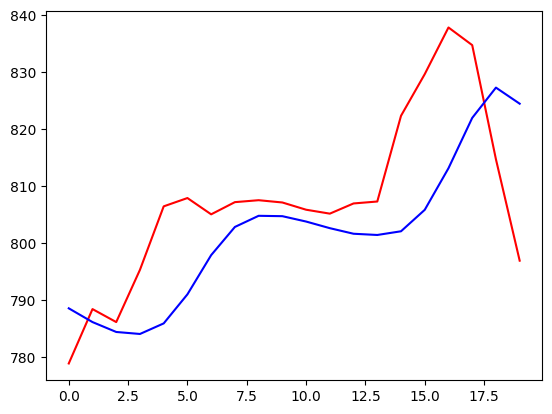

In [ ]:
plt.plot(real,color="red",label="real")
plt.plot(predicts,color="blue",label="fake")


In [ ]:
import math
from sklearn.metrics import mean_squared_error

In [ ]:
math.sqrt(mean_squared_error(real,predicts))

13.722232870460175